<a href="https://colab.research.google.com/github/AndrewstheBuilder/FromScratch_NeuralNetworks/blob/main/MultiLayerPerceptron_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

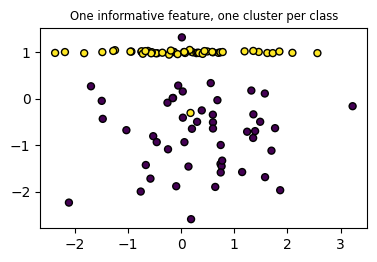

In [2]:
# Display Dataset to Train

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# Import Dataset to Train
train_length = int(len(X1) * 0.8)
test_length = len(X1) - train_length
train_x, test_x, train_y, test_y = X1[0:train_length], X1[train_length:], Y1[0:train_length], Y1[train_length:]
# print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

In [28]:
# Multi Layer Perceptron Implementation
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return total

class MLP:
  def __init__():
    '''
    '''
    pass

  def train():
    '''
    '''
    pass

  def predict():
    '''
    '''
    pass
def relu(x):
  if(x<1):
    return 0
  return 1

# First Attempt at solving this dataset with MLP

- I can attempt to solve this as a regression problem first
- Take in X and try to predict the Y for the 100 examples of [Xi, Yi] that I have. It will find the line separating the two classes I believe!
- And after that I can try it as a classification problem.
- Then solve the MNIST dataset with my MLP
- Then try to do it with a different architecture like KANs

### Draft 1: Has backpropagation for learning but its adjusting the weights and biases without taking into account the error and what direction we should be adjusting the weights in.
- This setup allows the ML algorithm to learn any linear 2 variable function.

In [19]:
weights = [1,1]
bias = 1
# n = Neuron(weights, None)
m = len(train_x)
iterations = 500
for n in range(iterations):
  for i in range(m):
    x1 = train_x[i][0]
    x2 = train_x[i][1]
    output = weights[0]*x1 + weights[1]*x2+ bias
    # Perform Loss Calculation
    error = (train_y[i] - output)
    # print('train_y[i]',train_y[i])
    # print('output',output)
    # Perform Back propagation to adjust the weight and bias
    weights[0] += -1 * x1
    weights[1] += -1 * x2
    bias += -1
  if(n%100 == 0):
    print('n:'+str(n)+' error:'+str(error))
# print(n)
# This implementation has the problem of exploding weights.
# I believe its because we are not taking into account the error. So we are adjusting
# the weight in the wrong direction

n:0 error:64.80613850000725
n:100 error:6736.202614332903
n:200 error:13407.599090165793
n:300 error:20078.99556599872
n:400 error:26750.39204183172


### Draft 2

In [58]:
weights = [1,1]
bias = 1
# n = Neuron(weights, None)
m = len(train_x)
iterations = 50
lr = 0.001
for n in range(iterations):
  for i in range(m):
    x1 = train_x[i][0]
    x2 = train_x[i][1]
    output = weights[0]*x1 + weights[1]*x2+bias
    output_relu = relu(output)
    # Perform Loss Calculation
    error = (train_y[i] - output_relu)
    # print('error',error)
    # print('train_y[i]',train_y[i])
    # print(weights)
    # print('output',output_relu)
    # Perform Back propagation to adjust the weight and bias
    # TODO Account for relu in backprop!
    weights[0] -= -1 * x1 * lr * error
    weights[1] -= -1 * x2 * lr * error
    bias += -1 * lr * error
  if(n%100 == 0):
    print('n:'+str(n)+' error:'+str(error))
# print(n)

n:0 error:0


## Using existing SKlearn MLP Implementation

In [49]:
clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(1,)).fit(train_x, train_y)

In [50]:
clf.score(test_x, test_y)

0.45

In [51]:
clf.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
print('test_y',test_y)

test_y [1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0]
